# **Midterm Project: AI-Generated Drawings with CLIP Scoring**
This notebook generates images using **Stable Diffusion**, applies **color/style variations**, and evaluates image-text alignment with **CLIP scoring**.

## **📌 1. Install Necessary Packages**

In [1]:
'''Run if necessary'''
!pip install --upgrade pip
!pip install freetype-py cairosvg Pillow diffusers transformers accelerate torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 143.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 136.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 M

## **📌 2. Import Libraries**

In [2]:
import pandas as pd
import torch
import io
import os
from PIL import Image, ImageEnhance, ImageOps
from transformers import CLIPProcessor, CLIPModel
from diffusers import StableDiffusionPipeline
from IPython.core.display import display

## **📌 3. Mount Google Drive (Optional)**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

output_dir = '/content/drive/MyDrive/Colab_Generated_Images'
os.makedirs(output_dir, exist_ok=True)

Mounted at /content/drive


## **📌 4. Load CLIP Model**

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
clip_model_name = 'openai/clip-vit-base-patch32'

clip_model = CLIPModel.from_pretrained(clip_model_name).to(device)
clip_processor = CLIPProcessor.from_pretrained(clip_model_name)

def clip_score(image_path: str, text_prompt: str) -> float:
    image = Image.open(image_path).convert('RGB')

    inputs = clip_processor(text=[text_prompt], images=image, return_tensors='pt', padding=True).to(device)

    with torch.no_grad():
        outputs = clip_model(**inputs)
        score = outputs.logits_per_image.item()

    return score

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

## **📌 5. Load Stable Diffusion Model**

In [5]:
sd_pipeline = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4').to(device)

def generate_image_from_text(text_prompt: str, output_path: str):
    image = sd_pipeline(text_prompt).images[0]
    image.save(output_path)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## **📌 6. Apply Color & Style Variations**

In [6]:
def modify_image(image_path: str, output_path: str, variation_type: str):
    image = Image.open(image_path).convert('RGB')

    if variation_type == 'bright':
        enhancer = ImageEnhance.Brightness(image)
        image = enhancer.enhance(1.5)
    elif variation_type == 'contrast':
        enhancer = ImageEnhance.Contrast(image)
        image = enhancer.enhance(1.4)
    image.save(output_path)

## **📌 7. Load Dataset & Process 5 Prompts**

In [7]:
train_path = '/content/train.csv'
train_df = pd.read_csv(train_path).head(5)

submission_rows = []
original_scores = []
modified_scores = []

for idx, row in train_df.iterrows():
    text_prompt = row['description']
    row_id = row['id']

    original_image_path = f'{output_dir}/{row_id}_original.png'
    generate_image_from_text(text_prompt, original_image_path)

    modified_image_path = f'{output_dir}/{row_id}_modified.png'
    modify_image(original_image_path, modified_image_path, variation_type='contrast')

    original_clip_score = clip_score(original_image_path, text_prompt)
    modified_clip_score = clip_score(modified_image_path, text_prompt)

    original_scores.append(original_clip_score)
    modified_scores.append(modified_clip_score)

    submission_rows.append({
        'id': row_id,
        'original_image_path': original_image_path,
        'modified_image_path': modified_image_path,
        'original_clip_score': original_clip_score,
        'modified_clip_score': modified_clip_score
    })

submission_df = pd.DataFrame(submission_rows)
submission_df.to_csv('submission.csv', index=False)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

## **📌 8. Display Images for Comparison**


🔹 Prompt: a starlit night over snow-covered peaks
🎨 Original Image (CLIP Score: 29.9684)


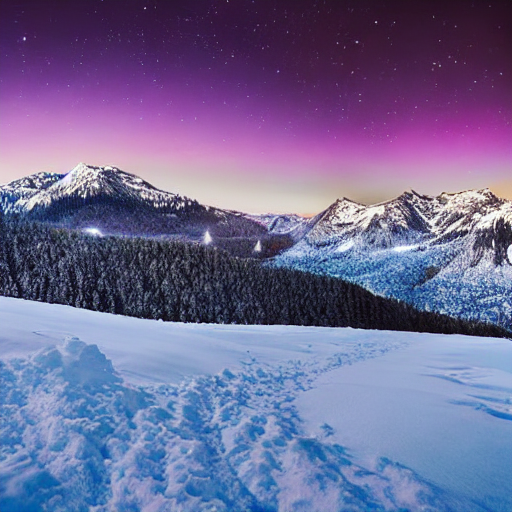

✨ Modified Image (CLIP Score: 29.8788)


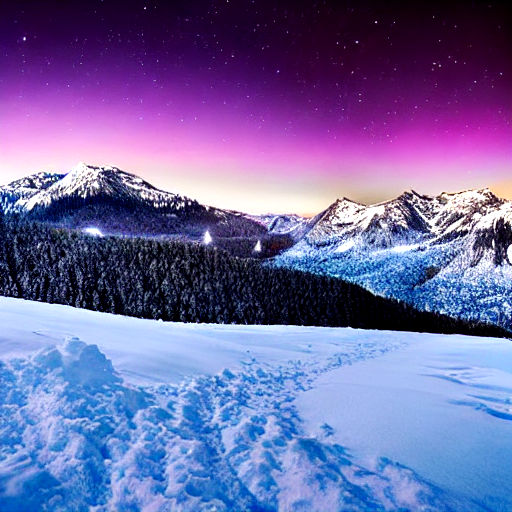


🔹 Prompt: black and white checkered pants
🎨 Original Image (CLIP Score: 33.7195)


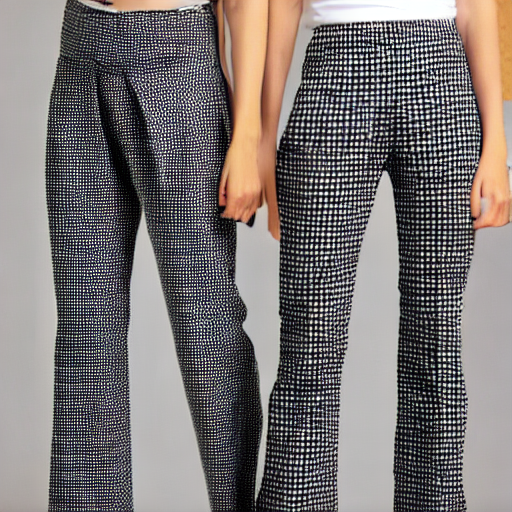

✨ Modified Image (CLIP Score: 34.2642)


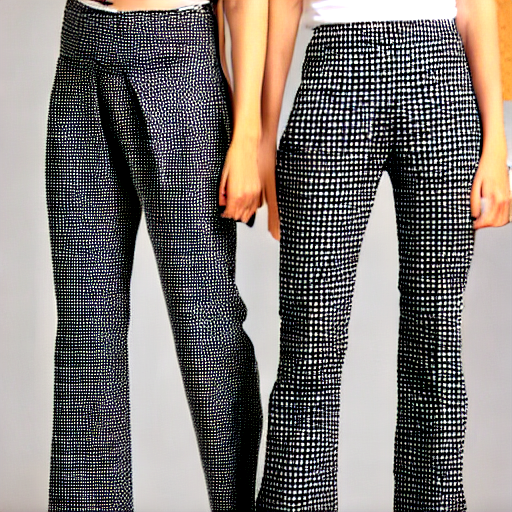


🔹 Prompt: crimson rectangles forming a chaotic grid
🎨 Original Image (CLIP Score: 32.3884)


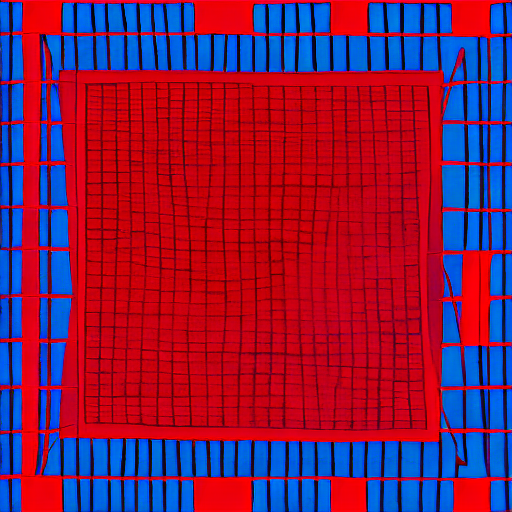

✨ Modified Image (CLIP Score: 32.6722)


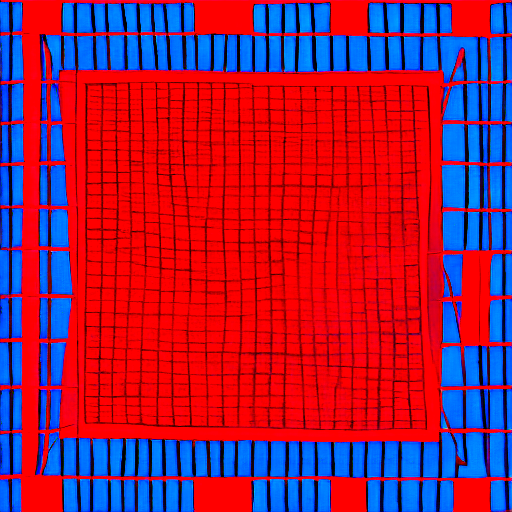


🔹 Prompt: burgundy corduroy pants with patch pockets and silver buttons
🎨 Original Image (CLIP Score: 32.4716)


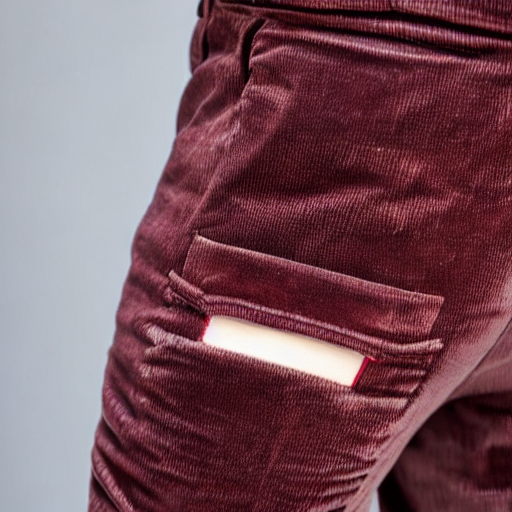

✨ Modified Image (CLIP Score: 31.7947)


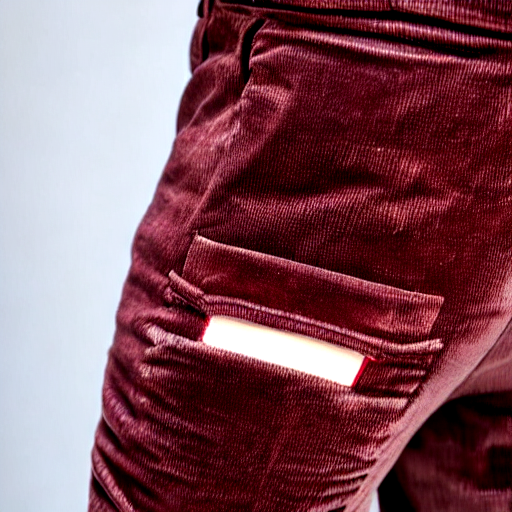


🔹 Prompt: orange corduroy overalls
🎨 Original Image (CLIP Score: 34.3191)


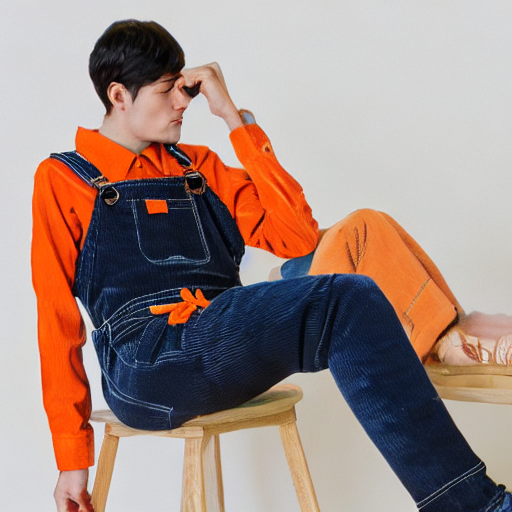

✨ Modified Image (CLIP Score: 33.0808)


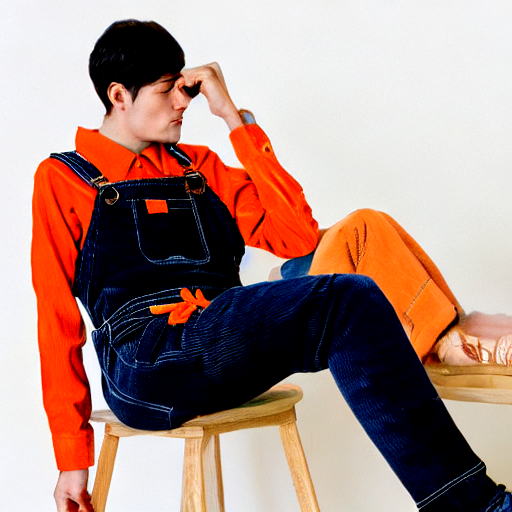

In [9]:
for i in range(len(submission_df)):
    row = submission_df.iloc[i]
    print(f"\n🔹 Prompt: {train_df.loc[i, 'description']}")

    print(f"🎨 Original Image (CLIP Score: {row['original_clip_score']:.4f})")
    display(Image.open(row['original_image_path']))

    print(f"✨ Modified Image (CLIP Score: {row['modified_clip_score']:.4f})")
    display(Image.open(row['modified_image_path']))

## **📌 9. Compute & Print Average CLIP Scores**

In [10]:
avg_original = sum(original_scores) / len(original_scores)
avg_modified = sum(modified_scores) / len(modified_scores)

print(f'📊 Average CLIP Score (Without Variations): {avg_original:.4f}')
print(f'📊 Average CLIP Score (With Variations): {avg_modified:.4f}')

📊 Average CLIP Score (Without Variations): 32.5734
📊 Average CLIP Score (With Variations): 32.3382
